# Communicate Data Finding Exploration For `Citi Bike Trip Data System of New York - 2019 `
## Gunja Chotai

<a id='wrangling'></a>
## Data Wrangling
Here I selected Citi Bike Trip System Data: https://www.citibikenyc.com/system-data as data source for exploration. Citi Bike Trip System Data provided data of bike trip held in 2019 in the Newyork.

In [1]:
# import packages and setting plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import zipfile as zf
import datetime

%matplotlib inline

In [7]:
# prepare dataset from diffrent csv file into single dataset
filelst = []
print ("featching data from zip file....")
for file in os.listdir(os.getcwd() + '/citybike/'):
    filename = (os.getcwd() + '/citybike/') + file
    df = pd.read_csv(filename)
    filelst.append(df)
df_trip = pd.concat(filelst) 
df =  df_trip.copy()   
df.shape

featching data from zip file....


(404947, 15)

In [8]:
#get sample data from dataset
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
5,737,2019-01-01 12:56:53.2040,2019-01-01 13:09:11.0400,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,-74.049638,29447,Subscriber,1993,1
6,917,2019-01-01 13:03:44.7760,2019-01-01 13:19:02.7690,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,-74.066611,29299,Subscriber,1986,1
7,3248,2019-01-01 13:12:03.1280,2019-01-01 14:06:12.0400,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,29495,Subscriber,1992,1
8,3168,2019-01-01 13:13:12.0450,2019-01-01 14:06:00.4110,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,26312,Customer,1969,0
9,353,2019-01-01 17:07:44.6670,2019-01-01 17:13:38.2640,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,26212,Subscriber,1994,1


In [4]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             404947 non-null  int64  
 1   starttime                404947 non-null  object 
 2   stoptime                 404947 non-null  object 
 3   start station id         404947 non-null  int64  
 4   start station name       404947 non-null  object 
 5   start station latitude   404947 non-null  float64
 6   start station longitude  404947 non-null  float64
 7   end station id           404947 non-null  int64  
 8   end station name         404947 non-null  object 
 9   end station latitude     404947 non-null  float64
 10  end station longitude    404947 non-null  float64
 11  bikeid                   404947 non-null  int64  
 12  usertype                 404947 non-null  object 
 13  birth year               404947 non-null  int64  
 14  gende

In [5]:
# get data type of all column in dataset 
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [6]:
# change the data type for start and end time to be datetime64[ns]
df.starttime = pd.to_datetime(df.starttime)
df.stoptime = pd.to_datetime(df.stoptime)

#set gender column as 'Male','Female' and 'Others'
df.loc[df['gender'] == 1, 'gender'] = 'Male'
df.loc[df['gender'] == 2, 'gender'] = 'Female'
df.loc[df['gender'] == 0, 'gender'] = 'Unknown'

# convert tripduration second to minute
df.tripduration = pd.to_numeric(df.tripduration/60)

#add age parameter to dataset
df['age'] = (2019 - df['birth year'])

#check data type of start and end time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             404947 non-null  float64       
 1   starttime                404947 non-null  datetime64[ns]
 2   stoptime                 404947 non-null  datetime64[ns]
 3   start station id         404947 non-null  int64         
 4   start station name       404947 non-null  object        
 5   start station latitude   404947 non-null  float64       
 6   start station longitude  404947 non-null  float64       
 7   end station id           404947 non-null  int64         
 8   end station name         404947 non-null  object        
 9   end station latitude     404947 non-null  float64       
 10  end station longitude    404947 non-null  float64       
 11  bikeid                   404947 non-null  int64         
 12  usertype         

In [7]:
# fine dataset basic information using describe
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,age
count,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000
mean,12.097379,3294.022391,40.722722,-74.046333,3292.219142,40.722328,-74.045792,28465.511998,1981.417524,37.582476
std,163.087289,171.021930,0.007037,0.010871,180.886426,0.006885,0.010829,1654.373618,10.257440,10.257440
min,1.016667,3183.000000,40.709651,-74.083639,116.000000,40.695065,-74.083639,14792.000000,1887.000000,16.000000
25%,3.883333,3195.000000,40.718355,-74.050444,3192.000000,40.718355,-74.050389,26286.000000,1975.000000,30.000000
50%,5.750000,3210.000000,40.721525,-74.043845,3207.000000,40.721124,-74.043117,29284.000000,1984.000000,35.000000
75%,9.666667,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,29536.000000,1989.000000,44.000000
max,42773.666667,3792.000000,40.748716,-74.032108,3792.000000,40.814326,-73.932077,41913.000000,2003.000000,132.000000


<a id='dataset'></a>
## Dataset

- There are 4,04,947 row in 16 column in data set  of Citi Bike Trip Data System. In this dataset column name's is  tripduration, starttime, stoptime, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude ,end station longitude, bikeid, usertype, birth year, gender and age. There are 10 numerical,2 datetime and 4 object type.

- Here I can develop chart using tripduration, usertype, age, Start Station name and gender from the dataset.

- I expect that usertype and age will have effects on trip duration. and mainly we can find from dataset that how much aged people like to bike trip and which gender is more interested in bike trip.

<a id='univariate'></a>
## Univariate Exploration
Univariate exploration means take single variable and Exploration of that variable on dataset. 

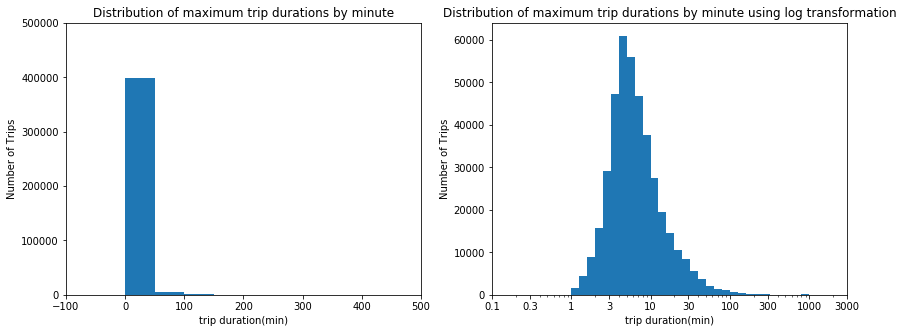

In [8]:
plt.figure(figsize=[14,5])
#set bin size
binsize = 50
bins_data = np.arange(0, df['tripduration'].max() + binsize, binsize)

#set data plot figure 
plt.subplot(1, 2, 1)
plt.hist(data = df, x = 'tripduration', bins = bins_data);
plt.title('Distribution of maximum trip durations by minute')
plt.xlabel('trip duration(min)')
plt.ylabel('Number of Trips')
plt.axis([-100, 500, 0, 500000])

#Add log transforation to above chart
#set bin size
bin_edges = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticsk_data =  [0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,1000,3000]
set_labels = ['{}'.format(v) for v in ticsk_data]
#set plot feature
plt.subplot(1, 2, 2)
plt.hist(data = df , x = 'tripduration' , bins = bin_edges);
plt.xlabel('trip duration(min)');
plt.xscale('log');
plt.xticks(ticsk_data,set_labels);
plt.title('Distribution of maximum trip durations by minute using log transformation')
plt.ylabel('Number of Trips')

plt.show()

- From above chart we cans't get proper information so here we add log transformation on that and try to get information.
- We can see from the distribution of data are symmetric, and maximum trip is about to 7 minute. It mostly coved trip from 1 minute to 100 minute.

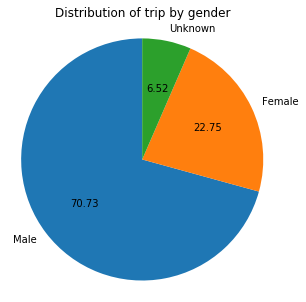

In [9]:
#find gender wise taken total trip 
plt.figure(figsize=[6,5])
# code for the pie chart seen above
sorted_counts = df['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.2f');
plt.axis('square')
plt.title('Distribution of trip by gender');
plt.show()

- Here we can see 70% of the city bike trip taken by male. According to 2019 city bike trip data, we can say that male are using almost 3 times more than female.

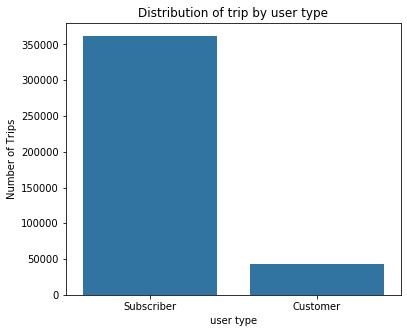

In [10]:
plt.figure(figsize=[6,5])
#set color and order in bar chart
base_color = sb.color_palette()[0]
cat_order = df['usertype'].value_counts().index
sb.countplot(data = df, x = 'usertype', color = base_color, order = cat_order);
plt.title('Distribution of trip by user type');
plt.xlabel('user type')
plt.ylabel('Number of Trips');

- Here we got that most of the people take subscription. From above image we can say that user type as subscriber is 12% more than subscriber. 

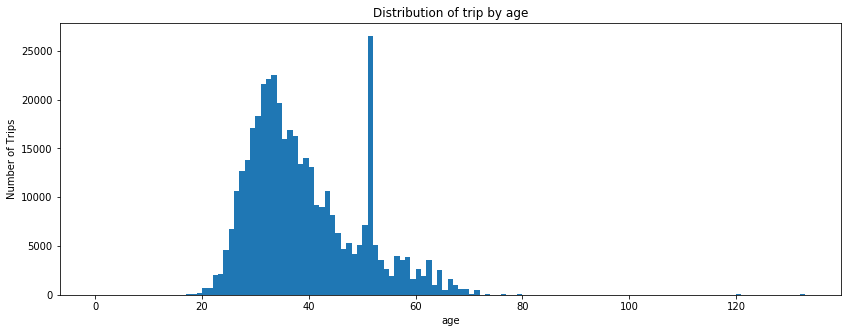

In [11]:
plt.figure(figsize = [14, 5]) # larger figure size for subplots
# histogram on left
bin_edges = np.arange(0, (datetime.datetime.now().year - df['birth year']).max()+1, 1)
sb.distplot(datetime.datetime.now().year - df['birth year'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1});
plt.title('Distribution of trip by age');
plt.xlabel('age')
plt.ylabel('Number of Trips');

- From above chart we can predict that mostly people at the age average 30 to 35 and around 50 year are using this bike trip system in Newyork. And we can say that from 20 to 70 years age people are using this system. So we can predict they provide service above 18 years age people only.  

<a id='bivariate'></a>
## Bivariate Exploration
Bivariate Exploration means to investigate data relationships between pairs of variables in to dataset.

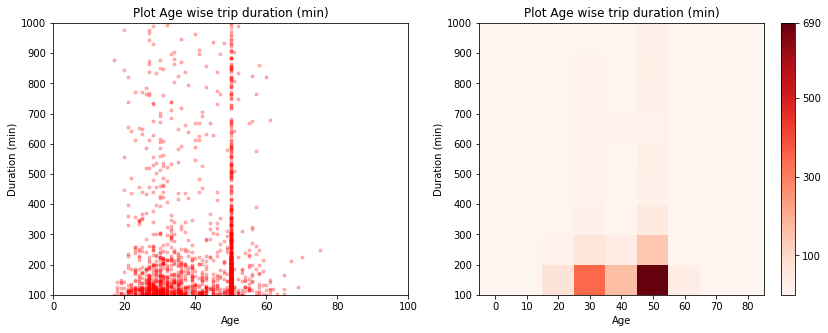

In [12]:
#set scatter plot chart 
plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['tripduration'], alpha = 0.25, marker = '.',color='red' )
plt.axis([0, 100, 100, 1000])
plt.title('Plot Age wise trip duration (min)')
plt.xlabel('Age')
plt.ylabel('Duration (min)')

#set hist2d chart
plt.subplot(1, 2, 2)
bins_y = np.arange(100, 1100, 100)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((df['age']), df['tripduration'],bins = [bins_x, bins_y],cmap=plt.cm.Reds)
plt.colorbar(ticks=[100,300,500,690]);

plt.title('Plot Age wise trip duration (min)')
plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.show()

- As we can see from above chart that For 690 minute trip people are using bike at the age of 50 which is good to see that people at this age are ambitious. 
- I must say people at at age of 50 around are more serious about helth and they do excercise using bike.

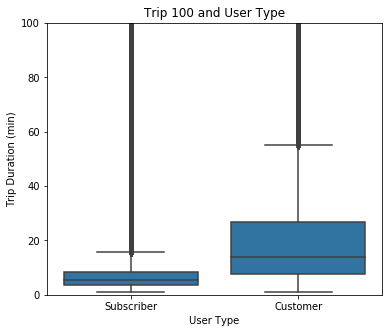

In [13]:
# set plot feature
plt.figure(figsize = [6, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'usertype', y = 'tripduration', color = base_color)
plt.ylim([0, 100])
plt.title('Trip 100 and User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()

- Above chart show that scbscriber are taking short bike trip compare to customer.

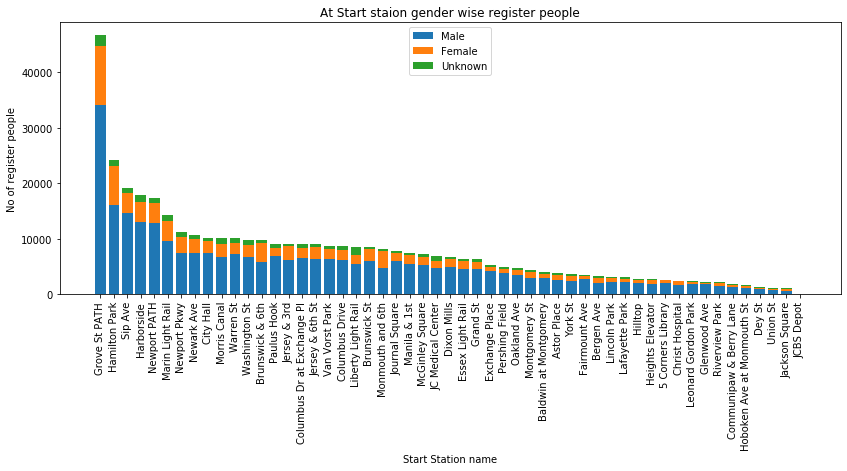

In [14]:
plt.figure(figsize=[14,5])
plt.xticks(rotation=90)

cat2_order = df['gender'].value_counts().keys()
cat1_order = df['start station name'].value_counts().keys()

baselines = np.zeros(len(cat1_order))
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['gender'] == cat2]['start station name'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)


plt.title('At Start staion gender wise register people')
plt.xlabel('Start Station name')
plt.ylabel('No of register people')
plt.show()

- From above chart 'Grove st PATH' start station is very busy station compare to all and 'JCBS Depot' is least register station
- so most of the people like to start their trip near by from 'Grove st PATH' station

<a id='multivariate'></a>
## Multivariate Exploration
Prepare chart using three or more variables to investigate your data from dataset.

C:\Users\Lenovo\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


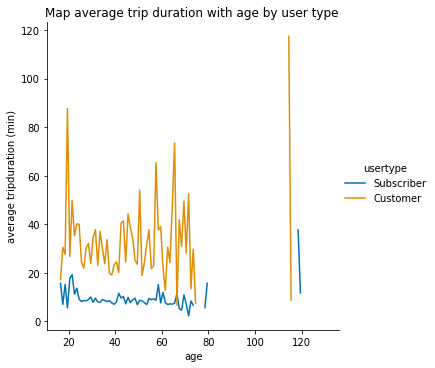

In [15]:
def mean_poly(x, y, bins = 1, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)
bin_edges = np.arange(0, df['age'].max(), 1);
g = sb.FacetGrid(data = df, hue = 'usertype', size = 5,palette = 'colorblind');
g.map(mean_poly, "age", "tripduration", bins = bin_edges);
g.set_ylabels('average tripduration (min)');
g.add_legend();
plt.title('Map average trip duration with age by user type ')
plt.show();

- Here i can say that subscriber is doing bike trip on an average 10 to 20 minute and highest trip duration using bike at age of 20. And customer doing 20 to 90 minute average trip and we can find that highest trip duration is average 90 minute at the age 20.
- and customer user at the age of 50 to 70 showing more interest in bike trip.
- customer user type average trip duration is much higher than subscriber.

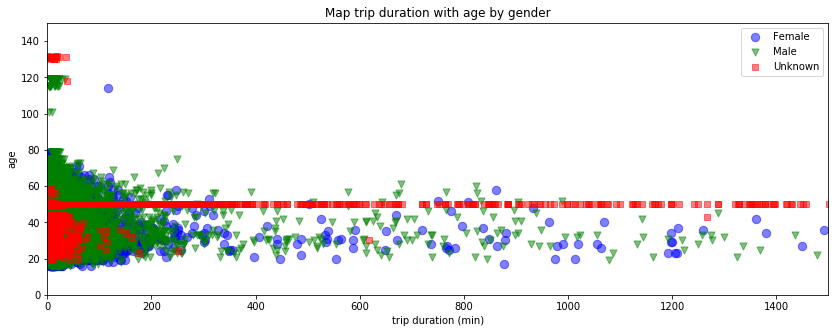

In [16]:
#create chart Map trip duration with age by gender
plt.figure(figsize=[14,5])
gender_icon = [['Female', 'o','blue',70],
               ['Male', 'v','green',50],
               ['Unknown', 's','Red',30]]

for gender, icon,clr,s in gender_icon:
    df_gender = df[df['gender'] == gender]
    plt.scatter(data = df_gender, x = 'tripduration', y = 'age',marker = icon, alpha= 0.5, c=clr, s=s)
plt.legend(['Female','Male','Unknown'])
plt.axis([0, 1500, 0, 150 ])
plt.title('Map trip duration with age by gender')
plt.xlabel('trip duration (min)')
plt.ylabel('age')
plt.show()

- As we can see from above chart, the people at the age of 50 didnt fill their gender proper.
- Here we can't figure out clear about gender so describe in diffrent chart as below.

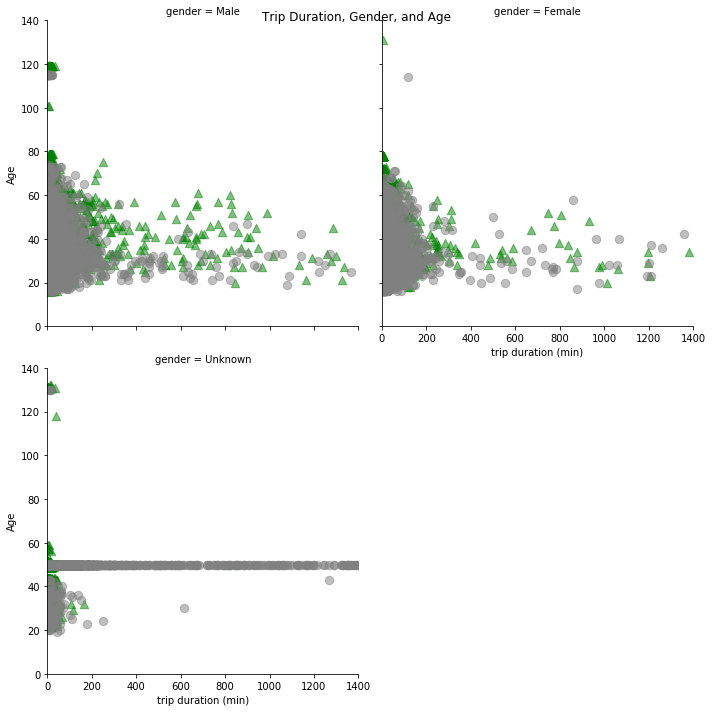

In [17]:
#discrit above chart Map trip duration with age by gender
pal = dict(Subscriber="green", Customer="gray")
gender = sb.FacetGrid(data = df, col = 'gender', col_wrap = 2, size = 5, palette=pal,
                 xlim = [0, 1400], ylim = [0, 140], hue="usertype",hue_order=["Subscriber", "Customer"],
                      hue_kws=dict(marker=["^", "o"]))
gender.map(plt.scatter, 'tripduration', 'age', alpha= 0.5,s=70)
gender.set_xlabels('trip duration (min)')
gender.set_ylabels('Age')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

- From above chart we can say that male and female both are doing bike trip at he age of18 to 80.
- unknown gender are almost doing bike trip at the age of 50.
- most of the female and unknown bike rider are are doing bike trip as customer user type where male has almost same ration for customer and subscriber user type.
- Maximum male trip duration is 300 where mostly female trip duration is 200 to 250 minute.